In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv(filepath_or_buffer="../data/CRIX.UPBIT.KRW-BTC_2017-11-01_2018-01-22.csv")
data['date'] = pd.to_datetime(data['date'],unit='ms') # 날짜 변환
data = data.set_index('date'); # date 를 인덱스로 설정

In [4]:
data.head()

low       high       open      close    volume  \
date                                                                        
2017-10-31 20:26:00  7259000.0  7259000.0  7259000.0  7259000.0  0.014000   
2017-10-31 20:27:00  7259000.0  7259000.0  7259000.0  7259000.0  0.007000   
2017-10-31 20:28:00  7259000.0  7259000.0  7259000.0  7259000.0  0.006832   
2017-10-31 20:29:00  7259000.0  7259000.0  7259000.0  7259000.0  0.014000   
2017-10-31 20:30:00  7259000.0  7259000.0  7259000.0  7259000.0  0.205419   

                     weightedAverage  
date                                  
2017-10-31 20:26:00     1.016260e+05  
2017-10-31 20:27:00     5.081300e+04  
2017-10-31 20:28:00     4.959617e+04  
2017-10-31 20:29:00     1.016260e+05  
2017-10-31 20:30:00     1.491138e+06

In [5]:
from sklearn.preprocessing import MinMaxScaler
values = data['open'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

83580 35820


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

83579
35819


In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)


Train on 83579 samples, validate on 35819 samples
Epoch 1/100
83579/83579 [==============================] - 10s 117us/step - loss: 0.0134 - val_loss: 0.0643
Epoch 2/100
83579/83579 [==============================] - 7s 83us/step - loss: 0.0185 - val_loss: 0.0522
Epoch 3/100
83579/83579 [==============================] - 7s 83us/step - loss: 0.0128 - val_loss: 0.0457
Epoch 4/100
83579/83579 [==============================] - 7s 83us/step - loss: 0.0122 - val_loss: 0.0351
Epoch 5/100
83579/83579 [==============================] - 7s 83us/step - loss: 0.0085 - val_loss: 0.0261
Epoch 6/100
83579/83579 [==============================] - 7s 83us/step - loss: 0.0059 - val_loss: 0.0162
Epoch 7/100
83579/83579 [==============================] - 7s 84us/step - loss: 0.0040 - val_loss: 0.0122
Epoch 8/100
83579/83579 [==============================] - 7s 84us/step - loss: 0.0030 - val_loss: 0.0091
Epoch 9/100
83579/83579 [==============================] - 7s 86us/step - loss: 0.0025 - val_loss: 0

83579/83579 [==============================] - 6s 77us/step - loss: 0.0015 - val_loss: 0.0060
Epoch 78/100
83579/83579 [==============================] - 6s 75us/step - loss: 0.0016 - val_loss: 0.0071
Epoch 79/100
83579/83579 [==============================] - 6s 75us/step - loss: 0.0016 - val_loss: 0.0059
Epoch 80/100
83579/83579 [==============================] - 7s 87us/step - loss: 0.0015 - val_loss: 0.0058
Epoch 81/100
83579/83579 [==============================] - 7s 84us/step - loss: 0.0015 - val_loss: 0.0058
Epoch 82/100
83579/83579 [==============================] - 7s 79us/step - loss: 0.0016 - val_loss: 0.0054
Epoch 83/100
83579/83579 [==============================] - 6s 76us/step - loss: 0.0015 - val_loss: 0.0050
Epoch 84/100
83579/83579 [==============================] - 6s 76us/step - loss: 0.0014 - val_loss: 0.0048
Epoch 85/100
83579/83579 [==============================] - 6s 77us/step - loss: 0.0014 - val_loss: 0.0046
Epoch 86/100
83579/83579 [========================

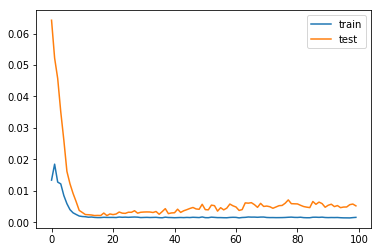

In [13]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

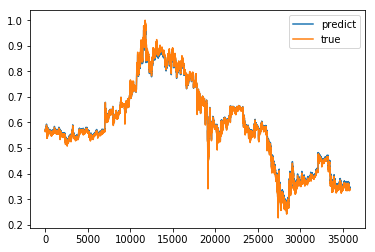

In [14]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [15]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [16]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 137658.168


In [25]:
#pyplot.plot(yhat_inverse, label='predict')
#pyplot.plot(testY_inverse, label='actual', alpha=0.5)
#pyplot.legend()
#pyplot.show()
trace_real = go.Scatter(x = [i for i in range(len(testY_inverse))], y=testY_inverse.flatten(), name="Real") # real
trace_pred = go.Scatter(x = [i for i in range(len(testY_inverse))], y=yhat_inverse.flatten(), name="Prediction") # pred
py.iplot([trace_real, trace_pred])

In [23]:
print(testY_inverse)
print(yhat_inverse)

[[19116000.]
 [19115000.]
 [19101000.]
 ...
 [14007000.]
 [13995000.]
 [14040000.]]
[[19192060.]
 [19206736.]
 [19205756.]
 ...
 [14184800.]
 [14161950.]
 [14150029.]]


In [38]:
df_result = pd.DataFrame({'test_y': testY_inverse.flatten(), 'pred_y': yhat_inverse.flatten()})
df_result['roc_test_y'] = df_result['test_y'].pct_change()
df_result['roc_pred_y'] = df_result['pred_y'].pct_change()

r = [x * y > 0 for x, y in zip(df_result['roc_test_y'], df_result['roc_pred_y'])]
print(sum(r) / len(r))

0.4924202239035149
